In [1]:
# Importing required libraries
import numpy as np
from gurobipy import *
import plotly.graph_objects as go
import helper
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Created a list of arrays for storing the list of coordinates for cities
city_list = np.array([
    [3, 9],       # City 0
    [7, 7],       # City 1
    [14, 6],      # City 2
    [7, 4],       # City 3
    [4, 3],       # City 4
    [2, 7],       # City 5
    [2, 15],      # City 6
    [2.7, 11.5],  # City 7
    [9, 11],      # City 8
    [12, 14],     # City 9
    [5, 9],       # City 10
    [6, 5],       # City 11
    [11, 2],      # City 12
    [14, 12],     # City 13
    [5, 13],      # City 14
    [10, 5],      # City 15
    [11, 8],      # City 16
    [3, 2],       # City 17
    [6, 10],      # City 18
    [6, 3],       # City 19
    [11, 5],      # City 20
    [3, 8],       # City 21
    [8.6, 9],     # City 22
    [13, 3],      # City 23
    [13, 10],     # City 24
    [1.7, 1.7],   # City 25
    [4, 4],       # City 26
    [4, 14],      # City 27
    [12, 6],      # City 28
    [6, 8],       # City 29
    [9, 2],       # City 30
    [13, 1],      # City 31
    [4.4, 12],    # City 32
    [10.5, 11.5], # City 33
    [2, 5],       # City 34
    [7.95, 13],      # City 35
    [8, 14],      # City 36
    [14, 5],      # City 37
    [3, 5],       # City 38
    [2, 8.5],     # City 39
    [5, 6],       # City 40
    [11, 13],     # City 41
    [12, 10],     # City 42
    [8, 2],       # City 43
    [4, 11],      # City 44
    [9, 4],       # City 45
    [4, 8],       # City 46
    [2, 10.5],    # City 47
    [12, 3],      # City 48
    [10, 4],      # City 49
     [5, 11],     # City 50
    [6, 2],       # City 51
    [8, 9],       # City 52
    [14, 11],     # City 53
    [2, 13],      # City 54
    [11, 7],      # City 55
    [9, 7],       # City 56
    [3, 7],       # City 57
    [11.5, 11.5],   # City 58
    [8, 12],        # City 59
    [7.6, 7.3],     # City 60
    [4.6, 6.1],     # City 61
    [14.2, 3.1],    # City 62
    [1.6, 9.1],     # City 63
    [9.6, 9.1],     # City 64
    [12.6, 4.6],    # City 65
    [10.6, 14.2],   # City 66
    [3.1, 3.1],     # City 67
    [8.4, 4.6],     # City 68
    [6.1, 6.1],     # City 69
    [13.4, 7.6],    # City 70
    [5.4, 1.6],     # City 71
    [3.1, 9.9],     # City 72
    [1.6, 3.1],     # City 73
    [12.1, 7.6],    # City 74
    [9.1, 15],      # City 75
    [10.9, 10.6],   # City 76
    [7.6, 12.7],    # City 77
    [4.6, 4.6],     # City 78
    [14.6, 13.6],   # City 79
    [4.2, 10.6],    # City 80
    [2.8, 12.1],    # City 81
    [12.1, 12.1],   # City 82
    [9.1, 10.6],    # City 83
    [11.3, 9],      # City 84
    [7.6, 4.6],     # City 85
    [3.1, 10.6],    # City 86
    [6.2, 15],      # City 87
    [14.1, 10.6],   # City 88
    [13.2, 14.5],   # City 89
    [12, 7.1],      # City 90
    [10.8, 2.3],    # City 91
    [13.5, 9.3],    # City 92
    [9.4, 2.4],     # City 93
    [14.8, 5.9],    # City 94
    [8.3, 13.2],    # City 95
    [11, 5.3],      # City 96
    [3.3, 14.2],    # City 97
    [5.8, 13],      # City 98
    [12.7, 10.9]    # City 99
])

In [3]:
WAIT_LIMIT = 10 / 60  # Defined the wait limit of drones to 10 minutes
DRONE_ENDURANCE = 30 / 60 # Defined the endurance of drones to 30 minutes
DRONE_TRAVEL_RADIUS = 20  # Defined the drone's travel radius to 20 miles

# defined Speeds in miles per hour for truck and drone
DRONE_SPEED = 50
TRUCK_SPEED = 35

# Created a list of cities where using drone is prohibited
DRONE_PROHIBITED_CITIES = []

In [4]:
n = len(city_list)  # number of cities
print(n)

100


In [5]:
def euclidean_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [6]:
def calculate_distance_matrix(city_list):
    n = len(city_list)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = helper.euclidean_distance(city_list[i], city_list[j])
    return dist_matrix

In [7]:
# Calculating the distance matrix between cities using Euclidean distance
dist_matrix = helper.calculate_distance_matrix(city_list)

In [8]:
# Formed an initial tour for two-opt heuristic using nearest neighbour
initial_tour = helper.nearest_neighbor(city_list)
print("Initial tour using nearest neighbor: ", initial_tour)

helper.plot_tour(city_list, initial_tour, DRONE_PROHIBITED_CITIES, "Nearest Neighbour Truck Tour")

# Calculate the total distance of the tour drawn by nearest neighbour method
total_distance_nearest_neighbour = helper.calculate_total_distance_time(initial_tour, dist_matrix)
print("Total Distance:", total_distance_nearest_neighbour)

Initial tour using nearest neighbor:  [0, 72, 86, 44, 80, 50, 32, 14, 98, 77, 35, 95, 36, 75, 66, 41, 9, 89, 79, 13, 53, 88, 24, 92, 42, 99, 82, 58, 33, 76, 84, 16, 55, 90, 74, 70, 2, 94, 37, 65, 28, 96, 20, 15, 49, 45, 68, 85, 3, 11, 69, 40, 61, 78, 26, 4, 67, 17, 25, 73, 34, 38, 57, 5, 21, 46, 10, 18, 29, 1, 60, 56, 22, 52, 64, 83, 8, 59, 87, 27, 97, 6, 54, 81, 7, 47, 63, 39, 19, 51, 71, 43, 30, 93, 91, 12, 48, 23, 62, 31, 0]


Total Distance: 137.05575027718032


In [9]:
# Solving the Vehicle Routing Problem for a large instance of cities using two-opt heuristic
two_opt_tour = helper.two_opt_heuristic(n, dist_matrix, initial_tour)
# Plot the two-opt tour
helper.plot_tour(city_list, two_opt_tour, DRONE_PROHIBITED_CITIES, "Two Opt Optimal Truck Tour")

# Calculate the total distance of the tour solved by two-opt heuristic
total_distance_two_opt = helper.calculate_total_distance_time(two_opt_tour, dist_matrix)
print("two opt tour: ", two_opt_tour)
print("Total Distance:", total_distance_two_opt)

two opt tour:  [0, 18, 10, 46, 21, 57, 61, 40, 29, 60, 1, 69, 11, 78, 26, 4, 67, 17, 25, 73, 34, 38, 5, 39, 63, 47, 7, 81, 54, 6, 97, 27, 87, 77, 35, 95, 36, 75, 66, 41, 9, 89, 79, 13, 53, 88, 92, 24, 42, 99, 82, 58, 33, 76, 84, 16, 55, 90, 74, 70, 2, 94, 37, 62, 31, 23, 48, 12, 91, 93, 30, 43, 51, 71, 19, 3, 85, 68, 45, 49, 65, 28, 96, 20, 15, 56, 52, 22, 64, 83, 8, 59, 98, 14, 32, 50, 80, 44, 86, 72, 0]
Total Distance: 125.98432055892863


In [10]:
# Calculating time matrices for drone and truck considering 35 mph and 50 mph speed for truck and drone respectively
truck_time_matrix, drone_time_matrix = helper.calculate_time_matrix(n, dist_matrix)

In [11]:
# Get region bounds from user
selected_cities = []
while True:
    # 1. Ask user if they want to select a new region
    choice = input("Do you want to add any drone prohibited region? (yes/no): ").strip().lower()
    if choice != 'yes':
        break

    min_x = float(input("Enter minimum x-coordinate: "))
    max_x = float(input("Enter maximum x-coordinate: "))
    min_y = float(input("Enter minimum y-coordinate: "))
    max_y = float(input("Enter maximum y-coordinate: "))

    # Identify cities within the region
    selected_cities += helper.get_cities_in_region((min_x, max_x), (min_y, max_y), city_list)

DRONE_PROHIBITED_CITIES = selected_cities
print(f"Cities in the prohibited region: {DRONE_PROHIBITED_CITIES}")

Cities in the prohibited region: [4, 17, 25, 26, 67, 73, 13, 24, 42, 53, 88, 92, 99]


In [12]:
# Determine the optimal drone operations based on the two-opt tour
drone_operations = []
drone_covered_cities = set()  # set to keep track of cities covered by drones

max_drones_allowed = helper.calculate_max_drones(len(two_opt_tour)-1) # finding the max number of drone tours that can be accomodated according to the number of cities

# Keep looking for drone operations until no more operations with substantial savings are found
while len(drone_operations) <= max_drones_allowed:
    best_start, best_end, best_drone_city, max_savings, least_wait_time = helper.find_drone_operations(two_opt_tour, DRONE_PROHIBITED_CITIES, drone_covered_cities, drone_operations, dist_matrix, drone_time_matrix, truck_time_matrix)
    if best_start is not None:
        drone_operations.append((best_start, best_end, best_drone_city, max_savings, least_wait_time))
        drone_covered_cities.add(best_start)
        drone_covered_cities.add(best_end)
        drone_covered_cities.add(best_drone_city)
    else:
        break

if not drone_operations:
    print("No suitable drone operation found!")
else:
    num_drones = len(drone_operations)
    print(f"Total Drone tours: {num_drones}\n")

for idx, operation in enumerate(drone_operations):
    start, end, drone_city, savings, drone_wait_time = operation
    print(f"Drone {idx + 1}")
    print(f"Start city for drone: {start}")
    print(f"Drone serves city: {drone_city}")
    print(f"End city for drone: {end}")
    print(f"Savings:", f"{savings * 60: .4f} minutes")
    print(f"Drone's waiting time for truck:", f"{drone_wait_time * 60: .4f} minutes")
    print("----------")
print("=========================================")

Total Drone tours: 17

Drone 1
Start city for drone: 22
Drone serves city: 83
End city for drone: 59
Savings: -0.0009 minutes
Drone's waiting time for truck:  0.0009 minutes
----------
Drone 2
Start city for drone: 49
Drone serves city: 28
End city for drone: 20
Savings: -0.0026 minutes
Drone's waiting time for truck:  0.0026 minutes
----------
Drone 3
Start city for drone: 93
Drone serves city: 51
End city for drone: 19
Savings: -0.0130 minutes
Drone's waiting time for truck:  0.0130 minutes
----------
Drone 4
Start city for drone: 34
Drone serves city: 5
End city for drone: 81
Savings: -0.0130 minutes
Drone's waiting time for truck:  0.0130 minutes
----------
Drone 5
Start city for drone: 97
Drone serves city: 27
End city for drone: 95
Savings: -0.0250 minutes
Drone's waiting time for truck:  0.0250 minutes
----------
Drone 6
Start city for drone: 36
Drone serves city: 41
End city for drone: 9
Savings: -0.0290 minutes
Drone's waiting time for truck:  0.0290 minutes
----------
Drone 7

In [13]:
adjusted_two_opt_tour = helper.adjust_two_opt_tour_for_drone_operations(two_opt_tour, drone_operations)

In [14]:
# Displaying the results
all_drone_tours_two_opt = []
for idx2, operation in enumerate(drone_operations):
    start, end, drone_city, _, _ = operation
    current_tour = [start, drone_city, end]
    all_drone_tours_two_opt.append(current_tour)

#print(all_drone_tours_two_opt)

helper.plot_tour(city_list, adjusted_two_opt_tour, DRONE_PROHIBITED_CITIES, "Two-opt Truck and Drone Optimal Tours", all_drone_tours_two_opt)

In [15]:
# Get region bounds from user
min_x = float(input("Enter minimum x-coordinate to perform Matheuristic: "))
max_x = float(input("Enter maximum x-coordinate to perform Matheuristic: "))
min_y = float(input("Enter minimum y-coordinate to perform Matheuristic: "))
max_y = float(input("Enter maximum y-coordinate to perform Matheuristic: "))

# Identify cities within the region
selected_cities = helper.get_cities_in_region((min_x, max_x), (min_y, max_y), city_list)
print(f"Cities in the selected region: {selected_cities}")

# Identify subtours in two_opt_tour containing the selected cities
selected_subtours = helper.get_subtours_in_region(adjusted_two_opt_tour, selected_cities)
print(f"Selected subtours: {selected_subtours}")

Cities in the selected region: [2, 8, 9, 12, 13, 15, 16, 20, 22, 23, 24, 28, 30, 31, 33, 36, 37, 41, 42, 43, 45, 48, 49, 52, 53, 55, 56, 58, 59, 62, 64, 65, 66, 68, 70, 74, 75, 76, 79, 82, 83, 84, 88, 89, 90, 91, 92, 93, 94, 95, 96, 99]
Selected subtours: [[95, 36, 75, 66, 9, 89, 79, 13, 53, 88, 92, 24, 42, 99, 82, 33, 76, 84, 55, 90, 74, 70, 94, 37, 62, 31, 23, 12, 91, 93, 30, 43], [45, 49, 65, 96, 20, 15, 52, 22, 64, 8, 59]]


In [16]:
# Sorting the selected segments based on their start position in the two_opt_tour
selected_subtours.sort(key=lambda x: adjusted_two_opt_tour.index(x[0]))

remaining_segments = []

# Initializing start of the first segment
start = 0

for segment in selected_subtours:
    start_idx = adjusted_two_opt_tour.index(segment[0])
    end_idx = adjusted_two_opt_tour.index(segment[-1])
    
    # Append the segment from 'start' to the start of the current segment (inclusive)
    remaining_segments.append(adjusted_two_opt_tour[start:start_idx+1])
    
    # Adjusting 'start' for the next iteration
    start = end_idx

# Appending the final segment from the end of the last selected segment to the end of two_opt_tour
remaining_segments.append(adjusted_two_opt_tour[start:])

print(remaining_segments)

[[0, 18, 10, 21, 57, 61, 29, 60, 1, 11, 78, 26, 4, 67, 17, 25, 73, 34, 38, 39, 63, 47, 7, 81, 54, 6, 97, 87, 77, 35, 95], [43, 71, 19, 3, 85, 45], [59, 98, 32, 50, 80, 86, 72, 0]]


In [17]:
all_edge_lists = []

# Looping over each segment to form a list of edges
for remaining_segment in remaining_segments:

    # Formating the tours into [i, j] format
    edge_list = [[remaining_segment[i], remaining_segment[i+1]] for i in range(len(remaining_segment)-1)]
    
    all_edge_lists.append(edge_list)

# Displaying the edge lists
for idx, edge_list in enumerate(all_edge_lists):
    print(f"Edge List for Segment {idx + 1}:")
    print(edge_list)


Edge List for Segment 1:
[[0, 18], [18, 10], [10, 21], [21, 57], [57, 61], [61, 29], [29, 60], [60, 1], [1, 11], [11, 78], [78, 26], [26, 4], [4, 67], [67, 17], [17, 25], [25, 73], [73, 34], [34, 38], [38, 39], [39, 63], [63, 47], [47, 7], [7, 81], [81, 54], [54, 6], [6, 97], [97, 87], [87, 77], [77, 35], [35, 95]]
Edge List for Segment 2:
[[43, 71], [71, 19], [19, 3], [3, 85], [85, 45]]
Edge List for Segment 3:
[[59, 98], [98, 32], [32, 50], [50, 80], [80, 86], [86, 72], [72, 0]]


In [18]:
# Creating a Gurobi model
model = Model()

t = {}
d = {}
x = {}
y = {}

for i in range(n):
    # Created binary decision variables for truck visiting cities (1 if the city i is visited by the truck, else 0)
    t[i] = model.addVar(vtype=GRB.BINARY, name=f't[{i}]')
    # Created binary decision variables for the drone visiting cities (1 if the drone visited the city i, else 0)
    d[i] = model.addVar(vtype=GRB.BINARY, name=f'd[{i}]')

    for j in range(n):
        # Created binary decision variables for the truck's path (1 if the truck travels from city i to city j, else 0)
        x[i, j] = model.addVar(vtype=GRB.BINARY, name=f'x[{i},{j}]') 
        # Created binary decision variables for the drone's path (1 if the drone travels from city i to city j, else 0)
        y[i, j] = model.addVar(vtype=GRB.BINARY, name=f'y[{i},{j}]')

# Setting the objective function to minimize the total distance travelled by truck and drone by the sum of distances the truck and drone travelled between all pair of cities
model.setObjective(
    quicksum(dist_matrix[i, j] * x[i, j] for i in range(n) for j in range(n))
    + quicksum(dist_matrix[i, j] * y[i, j] for i in range(n) for j in range(n)),
    GRB.MINIMIZE
)

# Setting the edges as 1 to freeze and perform the Matheuristics on the remaining tour
for idx, edge_list in enumerate(all_edge_lists):
    for edge in edge_list:
        i, j = edge
        model.addConstr(x[i, j] == 1)

for i in range(n):
    # Constraints for limiting the incoming and outgoing edges to a city to be exactly 1 if the truck visits that city and to form a complete/closed tour 
    model.addConstr(quicksum(x[i, j] for j in range(n) if i != j) == t[i])  # One outgoing edge if city is visited by the truck
    model.addConstr(quicksum(x[j, i] for j in range(n) if i != j) == t[i])  # One incoming edge if city is visited by the truck

# Constraints to prevent the drone and truck taking same path in their respective tours
for i in range(n):
    for j in range(n):
        if i != j:
            model.addConstr(x[i, j] + y[i, j] <= 1)
            model.addConstr(x[j, i] + y[i, j] <= 1)
            model.addConstr(x[i, j] + y[j, i] <= 1)
            model.addConstr(x[j, i] + y[j, i] <= 1)
            # The drone should not go back to the city from where it came
            #model.addConstr(y[i, j] + y[j, i] <= 1)

# Ensure the truck does not visit the cities served by the drone
for _, _, drone_city, _, _ in drone_operations:
    model.addConstr(t[drone_city] == 0)

# Constraints for each drone based on the drone_operations
for start, end, drone_city, _, _ in drone_operations:
    # Drone takes off from the truck's start city
    model.addConstr(y[start, drone_city] == 1)
    
    # Drone delivers and flies back to meet the truck at the end city
    model.addConstr(y[drone_city, end] == 1)

    # Drone serves only the specified city
    model.addConstr(d[drone_city] == 1)

    # Drone should only visit these 3 cities
    model.addConstr(quicksum(d[i] for i in [start, drone_city, end]) == 3)

# A dictionary to store the positions of decision variables in the truck's tour
u = {}
for i in range(n):
    u[i] = model.addVar(lb=1, ub=n, vtype=GRB.INTEGER, name=f'u[{i}]')

# Fixing the start and end city for the truck's tour
u[0].lb = u[0].ub = 0

# MTZ formulation for the truck to avoid forming subtours.... refered from WIKIPEDIA
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            model.addConstr(u[i] + (n - 1) * x[i, j] <= u[j] + (n - 2))

# A constraint to ensure all cities are visited by either truck or drone
model.addConstr(quicksum(t[i] for i in range(n) if i not in [drone_city for _, _, drone_city, _, _ in drone_operations]) == n - len(drone_operations))

# Optimize the model
model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-04
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 49630 rows, 20300 columns and 128550 nonzeros
Model fingerprint: 0xc037b308
Variable types: 0 continuous, 20300 integer (20200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [3e-01, 2e+01]
  Bounds range     [1e+00, 1e+02]
  RHS range        [1e+00, 1e+02]
Presolve removed 47827 rows and 18617 columns
Presolve time: 0.12s
Presolved: 1803 rows, 1683 columns, 8364 nonzeros
Variable types: 0 continuous, 1683 integer (1641 binary)
Found heuristic solution: objective 379.8253511

Root relaxation: objective 1.767038e+02, 154 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

In [19]:
# if the model is infeasible generate the ilp file to check the constraints causing infeasibility
if model.status == GRB.INFEASIBLE:
    model.computeIIS() # Compute Irreducible Inconsistent Subsystem
    model.write("model.ilp")

In [20]:
# x is the solution matrix for the truck
start_city = 0  # Starting city
truck_tour_updated = helper.get_tour_from_solution_matrix(x, start_city)
truck_tour_updated.append(start_city)

print(f"Truck tour: {truck_tour_updated}")

visited_cities = []
all_drone_tours = []

# y is the solution matrix for drone
for i in {i for (i, _) in y.keys()}:
    if i not in visited_cities:
        tour = helper.get_tour_from_solution_matrix(y, i)
        if len(tour) > 2:  # This ensures that the tour isn't just a single city
            all_drone_tours.append(tour)
            visited_cities.append(tour)

Truck tour: [0, 18, 10, 21, 57, 61, 29, 60, 1, 11, 78, 26, 4, 67, 17, 25, 73, 34, 38, 39, 63, 47, 7, 81, 54, 6, 97, 87, 77, 35, 95, 36, 75, 66, 9, 89, 79, 13, 53, 88, 99, 82, 33, 76, 42, 24, 92, 70, 94, 37, 65, 23, 62, 31, 12, 91, 93, 30, 43, 71, 19, 3, 85, 45, 49, 15, 20, 96, 55, 90, 74, 84, 64, 22, 52, 8, 59, 98, 32, 50, 80, 86, 72, 0]


In [21]:
total_all_drone_tours_distance_two_opt = 0.0
total_all_drone_tours_duration_two_opt = 0.0

# Iterating over all the drone tours directly
for idx, drone_tour_two_opt in enumerate(all_drone_tours_two_opt, 1):
    tour_distance = helper.calculate_total_distance_time(drone_tour_two_opt, dist_matrix)
    tour_duration = helper.calculate_total_distance_time(drone_tour_two_opt, drone_time_matrix)
    
    total_all_drone_tours_distance_two_opt += tour_distance
    total_all_drone_tours_duration_two_opt += tour_duration

total_all_drone_tours_distance = 0.0
total_all_drone_tours_duration = 0.0

# Iterating over all the drone tours directly
for idx, drone_tour in enumerate(all_drone_tours, 1):
    tour_distance = helper.calculate_total_distance_time(drone_tour, dist_matrix)
    tour_duration = helper.calculate_total_distance_time(drone_tour, drone_time_matrix)
    
    total_all_drone_tours_distance += tour_distance
    total_all_drone_tours_duration += tour_duration

In [22]:
# Create a list to store the table rows
table_data = []

# Calculate the total distance of the truck's tour
total_two_opt_tour_distance_truck = helper.calculate_total_distance_time(two_opt_tour, dist_matrix)
total_two_opt_tour_truck_duration = helper.calculate_total_distance_time(two_opt_tour, truck_time_matrix)

total_two_opt_tour_truck_distance_with_drones = helper.calculate_total_distance_time(adjusted_two_opt_tour, dist_matrix)
total_two_opt_tour_truck_duration_with_drones = helper.calculate_total_distance_time(adjusted_two_opt_tour, truck_time_matrix)

total_gurobi_distance_truck = helper.calculate_total_distance_time(truck_tour_updated, dist_matrix)
total_gurobi_truck_duration = helper.calculate_total_distance_time(truck_tour_updated, truck_time_matrix)

# Append rows for total distances and durations
table_data.append(["Two opt heuristics truck tour [before adding the drone]", f"{total_two_opt_tour_distance_truck:.2f} miles", f"{total_two_opt_tour_truck_duration:.2f} minutes"])
table_data.append(["Two opt heuristics truck tour [after adding the drone]", f"{total_two_opt_tour_truck_distance_with_drones:.2f} miles", f"{total_two_opt_tour_truck_duration_with_drones:.2f} minutes"])

#table_data.append(["Sum of two_opt heuristics drone tours", f"{total_all_drone_tours_distance_two_opt:.2f} miles", f"{total_all_drone_tours_duration_two_opt:.2f} minutes"])
table_data.append(["Sum of two_opt heuristics truck and drone tours combined", f"{total_all_drone_tours_distance_two_opt + total_two_opt_tour_truck_distance_with_drones:.2f} miles", f"{total_two_opt_tour_truck_duration_with_drones + total_all_drone_tours_duration_two_opt:.2f} minutes"])

helper.plot_tour(city_list, initial_tour, [], "Nearest Neighbour Truck Tour")

helper.plot_tour(city_list, two_opt_tour, DRONE_PROHIBITED_CITIES, "Two Opt Optimal Truck Tour")

helper.plot_tour(city_list, adjusted_two_opt_tour, DRONE_PROHIBITED_CITIES, " Two-opt Truck and Drone Optimal Tours", all_drone_tours_two_opt)

table_data.append(["Matheuristics truck tour", f"{total_gurobi_distance_truck:.2f} miles", f"{total_gurobi_truck_duration:.2f} minutes"])
#table_data.append(["Total of Matheuristics drone tours", f"{total_all_drone_tours_distance:.2f} miles", f"{total_all_drone_tours_duration:.2f} minutes"])
table_data.append(["Total of Matheuristics truck and drone tours combined", f"{total_all_drone_tours_distance + total_gurobi_distance_truck:.2f} miles", f"{total_gurobi_truck_duration + total_all_drone_tours_duration:.2f} minutes"])

# Plot the optimal tours
helper.plot_tour(city_list, truck_tour_updated, DRONE_PROHIBITED_CITIES, "Matheuristic Truck and Drone Optimal Tours", all_drone_tours)

# Print the table
table_headers = ["Tour Details", "Distance", "Duration"]


In [23]:
# Print the table with the "fancy_grid" format
print("\n\n")
print("RESULTS SUMMARY".center(80, "="))
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))
print("\n\n")




================================RESULTS SUMMARY=================================
╒══════════════════════════════════════════════════════════╤══════════════╤══════════════╕
│ Tour Details                                             │ Distance     │ Duration     │
╞══════════════════════════════════════════════════════════╪══════════════╪══════════════╡
│ Two opt heuristics truck tour [before adding the drone]  │ 125.98 miles │ 3.60 minutes │
├──────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Two opt heuristics truck tour [after adding the drone]   │ 121.44 miles │ 3.47 minutes │
├──────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Sum of two_opt heuristics truck and drone tours combined │ 186.38 miles │ 4.77 minutes │
├──────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Matheuristics truck tour                                 │ 116.05 miles │ 3.32 minutes │
├─────

In [24]:
# Add a title and separator for Two-opt Heuristics
print("\n\n")
print("TWO-OPT HEURISTICS".center(80, "="))

two_opt_data = [
    table_data[0], 
    table_data[1], 
    table_data[2]
]
print(tabulate(two_opt_data, headers=table_headers, tablefmt="fancy_grid"))

# Add a title and separator for Matheuristics
print("\n")
print("MATHEURISTICS".center(80, "="))

matheuristics_data = [
    table_data[3],
    table_data[4]
]
print(tabulate(matheuristics_data, headers=table_headers, tablefmt="fancy_grid"))
print("\n\n")





===============================TWO-OPT HEURISTICS===============================
╒══════════════════════════════════════════════════════════╤══════════════╤══════════════╕
│ Tour Details                                             │ Distance     │ Duration     │
╞══════════════════════════════════════════════════════════╪══════════════╪══════════════╡
│ Two opt heuristics truck tour [before adding the drone]  │ 125.98 miles │ 3.60 minutes │
├──────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Two opt heuristics truck tour [after adding the drone]   │ 121.44 miles │ 3.47 minutes │
├──────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ Sum of two_opt heuristics truck and drone tours combined │ 186.38 miles │ 4.77 minutes │
╘══════════════════════════════════════════════════════════╧══════════════╧══════════════╛


=================================MATHEURISTICS==================================
╒═════════════

In [25]:
import warnings
warnings.filterwarnings('ignore')

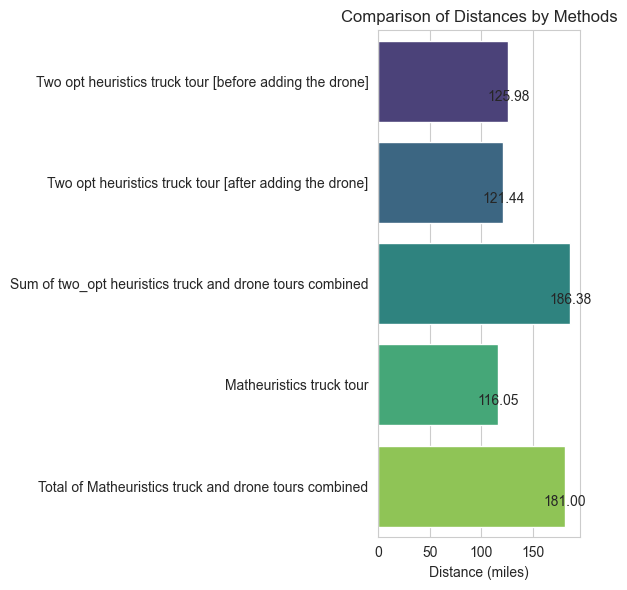

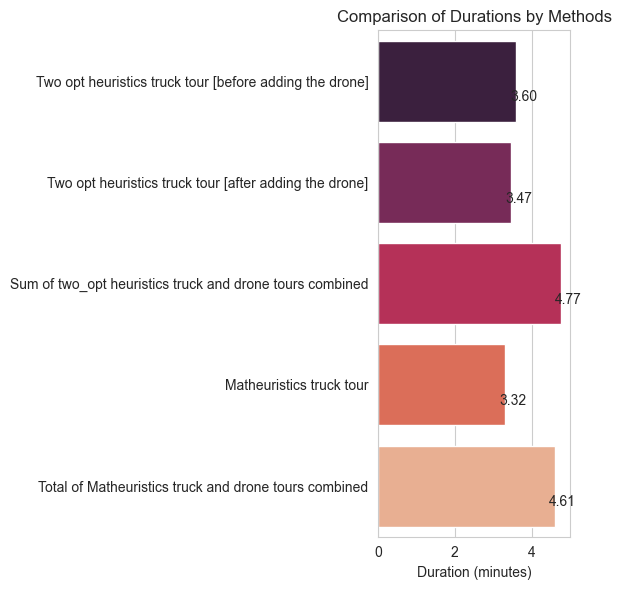

In [26]:
helper.plot_comparison(table_data)